In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
barley=pd.read_csv('barley.csv')
corn_maize=pd.read_csv('corn_maize.csv')
millet=pd.read_csv('millet.csv')
nut=pd.read_csv('nut.csv')
oat=pd.read_csv('oat.csv')
potato=pd.read_csv('potato.csv')
quinoa=pd.read_csv('quinoa.csv')
rice=pd.read_csv('rice.csv')
rye=pd.read_csv('rye.csv')
sorghum=pd.read_csv('sorghum.csv')
soybean=pd.read_csv('soybean.csv')
wheat=pd.read_csv('wheat.csv')


In [7]:
wheat.head()

,PROJECT_ID,PROJECT_TERMS,PROJECT_TITLE,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_START_DATE,PROJECT_END_DATE,CONTACT_PI_PROJECT_LEADER,...,ORGANIZATION_STATE,ORGANIZATION_ZIP,ORGANIZATION_COUNTRY,BUDGET_START_DATE,BUDGET_END_DATE,CFDA_CODE,FY,FY_TOTAL_COST,FY_TOTAL_COST_SUB_PROJECTS,ABSTRACT
0,584433,Anabolism; antiporter; Arabidopsis; Biochemis...,"PHYTONUTRIENT BIOCHEMISTRY, PHYSIOLOGY, AND TR...",USDA,ARS,NaN,ARS-0408087,5/21/2004,3/31/2009,"UPCHURCH, DAN R",...,TX,77030,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): 1) Identify and characterize pla...
1,584463,Affect; Biochemical; Bread; Breeding; Carbohy...,ENHANCE HARD SPRING AND DURUM WHEAT QUALITY AN...,USDA,ARS,NaN,ARS-0408465,9/10/2004,7/5/2009,"HARELAND, GARY A",...,ND,58102-2765,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Evaluate the processing and end-...
2,584455,Avena sativa; biosecurity; Breeding; Cereals;...,OBJECTIVE GRADING AND END-USE PROPERTY ASSESSM...,USDA,ARS,NaN,ARS-0408432,9/25/2004,7/5/2009,"PEARSON, THOMAS CLARK",...,KS,66502,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Develop instrumentation and proc...
3,584464,Amino Acids; Amylopectin; Amylose; base; Bioc...,OPTICAL PROPERTIES OF SMALL GRAINS FOR RAPID A...,USDA,ARS,NaN,ARS-0408471,9/15/2004,9/3/2009,"DELWICHE, STEPHEN R",...,MD,20705,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): (1) Develop an automated system ...
4,584523,Architecture; Bioinformatics; Cell Wall; Cere...,BIOTECHNOLOGICAL ENHANCEMENT OF ENERGY CROPS,USDA,ARS,NaN,ARS-0408875,8/15/2004,8/14/2009,"ANDERSON, OLIN D",...,CA,94710,UNITED STATES,NaN,NaN,10.001,2004,NaN,NaN,Objective(s): Develop the necessary range of k...


In [5]:
print('total number of projects for wheat',wheat.shape[0])
print('total number of projects with no funding for wheat',wheat['FY_TOTAL_COST'].isna().sum())
print('----')
print('----')



total number of projects for wheat 2025
total number of projects with no funding for wheat 725
----
----
total number of projects for potato 855
total number of projects with no funding for potato 366
----
----
total number of projects for maize 1192
total number of projects with no funding for maize 289
----
----
total number of projects for coarse_grains 33
total number of projects with no funding for coarse_grains 2
----
----
total number of projects for corn 5682
total number of projects with no funding for corn 2150
----
----
total number of projects for beans 1889
total number of projects with no funding for beans 866
----
----
total number of projects for legumes 854
total number of projects with no funding for legumes 333
----
----
total number of projects for pulses 2459
total number of projects with no funding for pulses 44
----
----
total number of projects for soy 2603
total number of projects with no funding for soy 862
----
----


# count occurances of each word

In [77]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in wheat['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = line.strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('wheat_word_count.csv')

In [78]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in maize['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = line.strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('maize_word_count.csv')

In [79]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in coarse_grains['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = line.strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('coarse_grains_word_count.csv')

In [82]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in corn['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('corn_word_count.csv')

In [83]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in beans['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('beans_word_count.csv')

In [85]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in pulses['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('pulses_word_count.csv')

In [86]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in legumes['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('legumes_word_count.csv')

In [87]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in potato['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('potato_word_count.csv')

In [88]:
# Create an empty dictionary 
import string 
import operator
d = dict() 
  
# Loop through each line of the file 
for line in soy['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('soy_word_count.csv')

In [89]:

d = dict() 
  
# Loop through each line of the file 
for line in legumes['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 

# Loop through each line of the file 
for line in wheat['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 
# Loop through each line of the file 
for line in maize['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 

# Loop through each line of the file 
for line in soy['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 


# Loop through each line of the file 
for line in corn['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 

# Loop through each line of the file 
for line in coarse_grains['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 

# Loop through each line of the file 
for line in pulses['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 

# Loop through each line of the file 
for line in potato['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 

# Loop through each line of the file 
for line in beans['Project Terms']: 
    # Remove the leading spaces and newline character 
    line = str(line).strip() 
  
    # Convert the characters in line to  
    # lowercase to avoid case mismatch 
    line = line.lower() 
  
    # Remove the punctuation marks from the line 
    line = line.translate(line.maketrans("", "", string.punctuation)) 
  
    # Split the line into words 
    words = line.split(" ") 
  
    # Iterate over each word in line 
    for word in words: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1
#Print the contents of dictionary 

sorted_d = dict(sorted(d.items(), key=operator.itemgetter(1),reverse=True))
df = pd.DataFrame.from_dict(sorted_d, orient="index")
df.to_csv('all_word_count.csv')

# Word-cloud

In [6]:
text_wheat = " ".join(str(review) for review in wheat['Project Terms'])
print ("There are {} words in the combination of wheat review.".format(len(text_wheat)))
text_soy = " ".join(str(review) for review in soy['Project Terms'])
print ("There are {} words in the combination of soy review.".format(len(text_soy)))
text_maize = " ".join(str(review) for review in maize['Project Terms'])
print ("There are {} words in the combination of maize review.".format(len(text_maize)))
text_pulses = " ".join(str(review) for review in pulses['Project Terms'])
print ("There are {} words in the combination of pulses review.".format(len(text_pulses)))
text_legumes = " ".join(str(review) for review in legumes['Project Terms'])
print ("There are {} words in the combination of legumes review.".format(len(text_legumes)))
text_beans = " ".join(str(review) for review in beans['Project Terms'])
print ("There are {} words in the combination of beans review.".format(len(text_beans)))
text_corn = " ".join(str(review) for review in corn['Project Terms'])
print ("There are {} words in the combination of corn review.".format(len(text_corn)))
text_coarse_grains = " ".join(str(review) for review in coarse_grains['Project Terms'])
print ("There are {} words in the combination of coarse_grains review.".format(len(text_coarse_grains)))
text_potato = " ".join(str(review) for review in potato['Project Terms'])
print ("There are {} words in the combination of potato review.".format(len(text_potato)))
text = text_wheat+text_soy+text_maize+text_pulses+text_legumes+text_beans+text_corn+text_coarse_grains+text_potato
print ("There are {} words in the combination of all review.".format(len(text)))

There are 1413838 words in the combination of wheat review.
There are 2079515 words in the combination of soy review.
There are 984417 words in the combination of maize review.
There are 2356172 words in the combination of pulses review.
There are 574982 words in the combination of legumes review.
There are 1107906 words in the combination of beans review.
There are 3741680 words in the combination of corn review.
There are 16215 words in the combination of coarse_grains review.
There are 484973 words in the combination of potato review.
There are 12759698 words in the combination of all review.


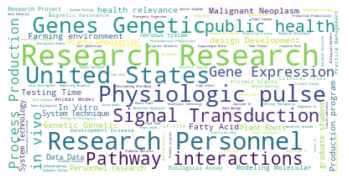

In [7]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('figures/count.png')
plt.close(fig)

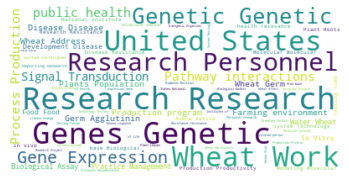

In [8]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel','Wheat'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_wheat)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

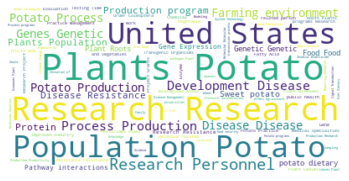

In [9]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_potato)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

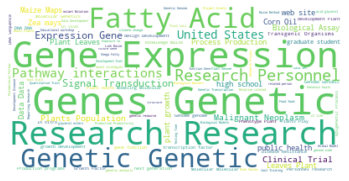

In [10]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_maize)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

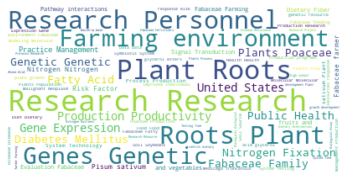

In [11]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_legumes)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

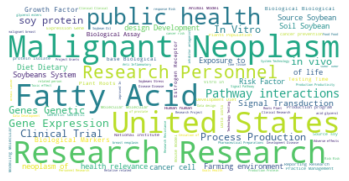

In [12]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_soy)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

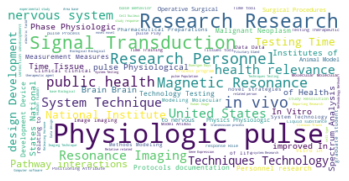

In [13]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_pulses)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

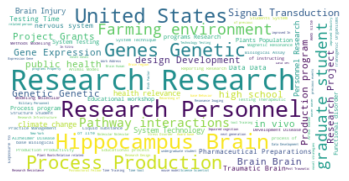

In [14]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_corn)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

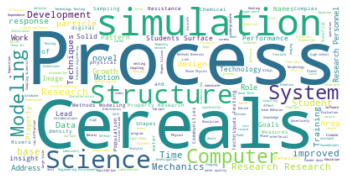

In [15]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_coarse_grains)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

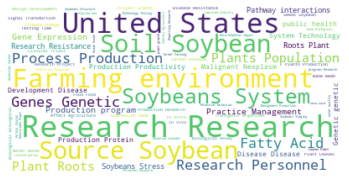

In [16]:
#stopwords = set(STOPWORDS)
stopwords=(["wheat", "soy", "maize", "pulses", "legumes","beans","corn","coarse_grains","potato",'pulse',
                  "public health","Research",'United States','study','Research Research','Research Personnel'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_beans)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Fundings based on Agency

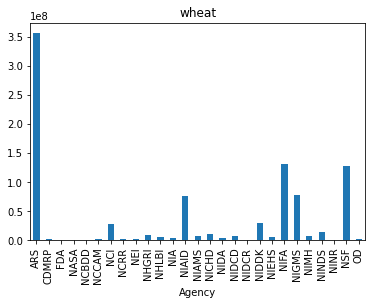

In [17]:
wheat.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='wheat')
  

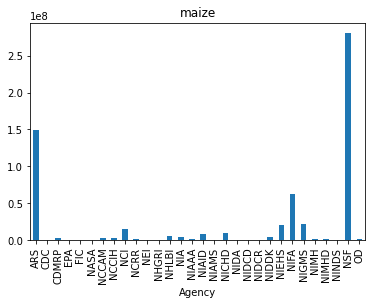

In [18]:
maize.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='maize')

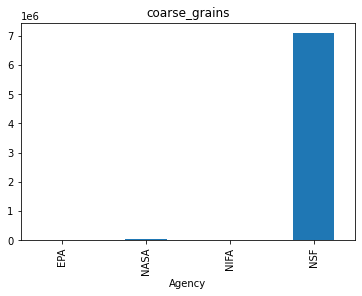

In [19]:
coarse_grains.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='coarse_grains')

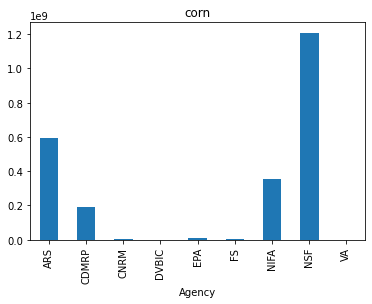

In [20]:
corn.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='corn')

In [21]:
pulses.Agency.unique()

array(['NHLBI', 'NSF', 'NICHD', 'NIBIB', 'NINDS', 'NIDA', 'NIAMS', 'NIMH',
       'NCI', 'NCRR', 'NIGMS', 'CNRM', 'VA', 'NEI', 'NIAID', 'NIDDK',
       'NIDCD', 'NIEHS', 'NIA', 'CDMRP', 'CLC', 'NINR', 'NIFA', 'NIDCR',
       'EPA', 'OD', 'NIAAA', 'FIC', 'NHGRI', 'ARS', 'NIOSH', 'NIMHD'],
      dtype=object)

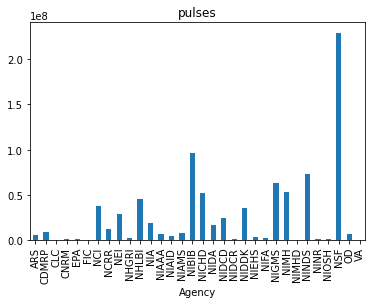

In [22]:
pulses.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='pulses')

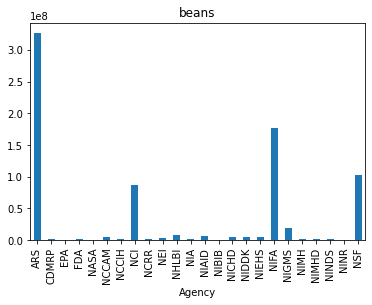

In [23]:
beans.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='beans')

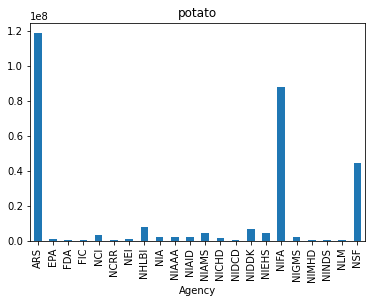

In [24]:
potato.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='potato')

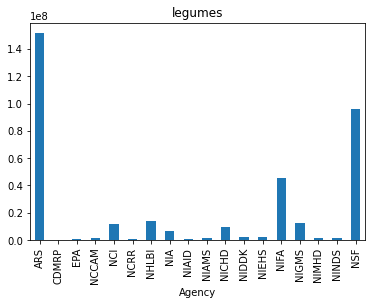

In [25]:
legumes.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='legumes')

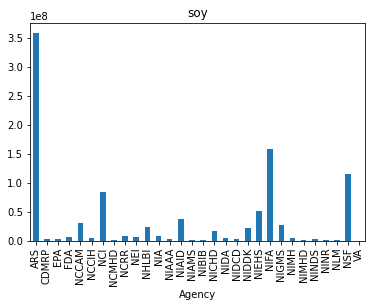

In [26]:
soy.groupby(['Agency'])['FY Total Cost'].sum().plot(kind='bar',title='soy')

# Yearly fundings

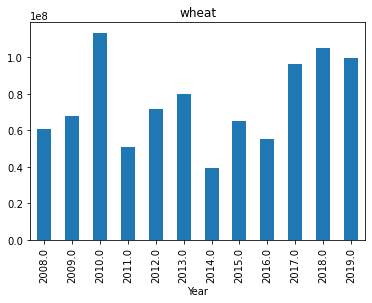

In [27]:
wheat.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='wheat')
  

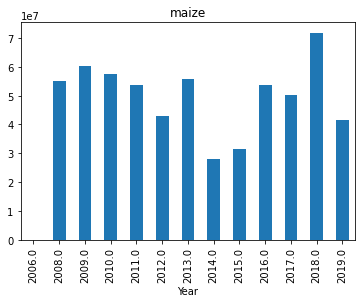

In [28]:
maize.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='maize')

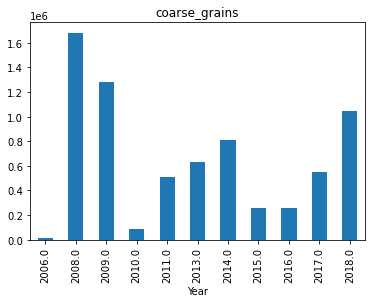

In [29]:
coarse_grains.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='coarse_grains')

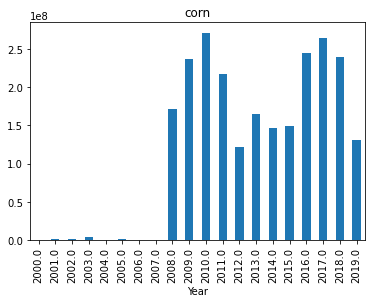

In [30]:
corn.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='corn')

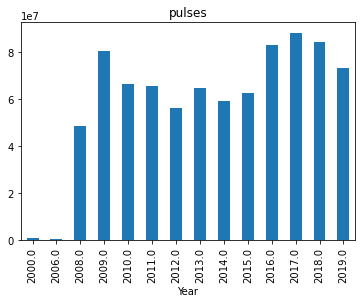

In [31]:
pulses.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='pulses')

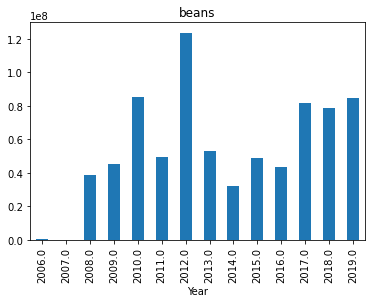

In [32]:
beans.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='beans')

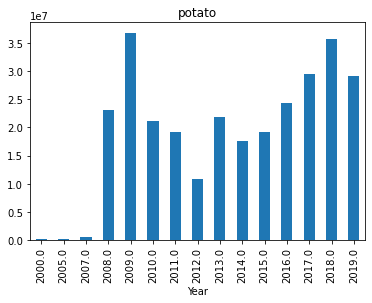

In [33]:
potato.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='potato')

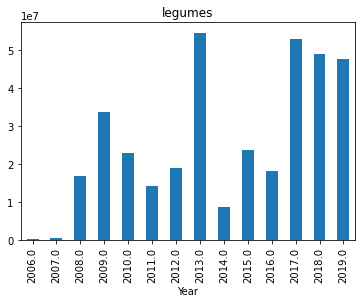

In [34]:
legumes.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='legumes')

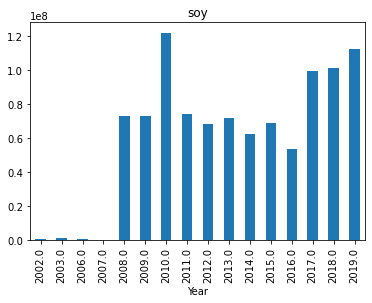

In [35]:
soy.groupby(['Year'])['FY Total Cost'].sum().plot(kind='bar',title='soy')

# Total Funding Distribution

<BarContainer object of 9 artists>

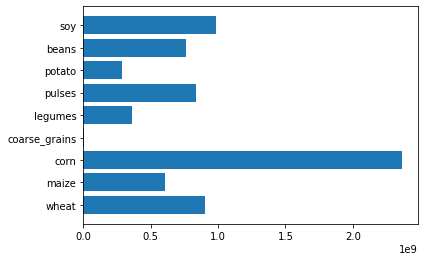

In [36]:
funding=[wheat['FY Total Cost'].sum(),maize['FY Total Cost'].sum(),corn['FY Total Cost'].sum(),
         coarse_grains['FY Total Cost'].sum(),legumes['FY Total Cost'].sum(),pulses['FY Total Cost'].sum(),
         potato['FY Total Cost'].sum(),beans['FY Total Cost'].sum(),soy['FY Total Cost'].sum()]
category=['wheat','maize','corn','coarse_grains','legumes','pulses','potato','beans','soy']
plt.barh(category,funding)

# count of 0 funding and non-zero funding projects for each agency

total projects 1889
count of non-zero funded projects 1023
count of zero fundings project 866


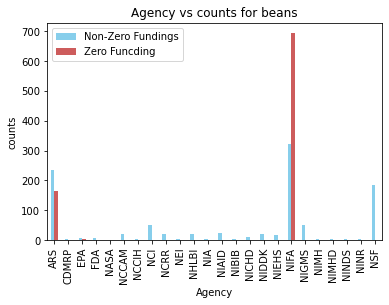

In [63]:
print('total projects',beans.shape[0])
print('count of non-zero funded projects',sum(beans.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(beans['FY Total Cost'].isnull().groupby([beans['Agency']]).sum().astype(int).to_list()))

non_zero=beans.groupby(['Agency'])['FY Total Cost'].count()
zero=beans['FY Total Cost'].isnull().groupby([beans['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for beans")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 33
count of non-zero funded projects 31
count of zero fundings project 2


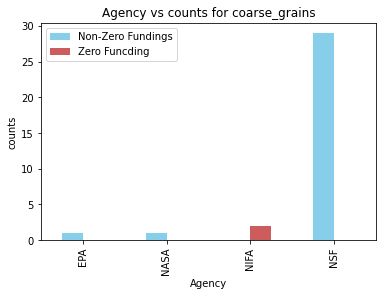

In [64]:
print('total projects',coarse_grains.shape[0])
print('count of non-zero funded projects',sum(coarse_grains.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(coarse_grains['FY Total Cost'].isnull().groupby([coarse_grains['Agency']]).sum().astype(int).to_list()))

non_zero=coarse_grains.groupby(['Agency'])['FY Total Cost'].count()
zero=coarse_grains['FY Total Cost'].isnull().groupby([coarse_grains['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for coarse_grains")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 854
count of non-zero funded projects 521
count of zero fundings project 333


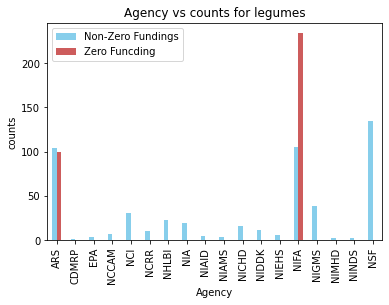

In [65]:
print('total projects',legumes.shape[0])
print('count of non-zero funded projects',sum(legumes.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(legumes['FY Total Cost'].isnull().groupby([legumes['Agency']]).sum().astype(int).to_list()))

non_zero=legumes.groupby(['Agency'])['FY Total Cost'].count()
zero=legumes['FY Total Cost'].isnull().groupby([legumes['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for legumes")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 2603
count of non-zero funded projects 1741
count of zero fundings project 862


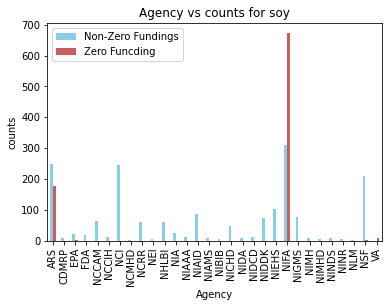

In [66]:
print('total projects',soy.shape[0])
print('count of non-zero funded projects',sum(soy.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(soy['FY Total Cost'].isnull().groupby([soy['Agency']]).sum().astype(int).to_list()))

non_zero=soy.groupby(['Agency'])['FY Total Cost'].count()
zero=soy['FY Total Cost'].isnull().groupby([soy['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for soy")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 2459
count of non-zero funded projects 2415
count of zero fundings project 44


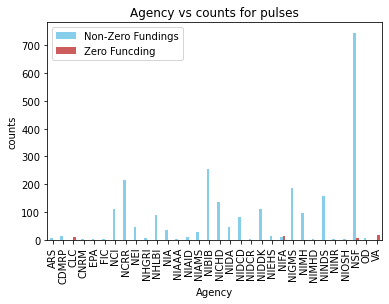

In [67]:
print('total projects',pulses.shape[0])
print('count of non-zero funded projects',sum(pulses.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(pulses['FY Total Cost'].isnull().groupby([pulses['Agency']]).sum().astype(int).to_list()))

non_zero=pulses.groupby(['Agency'])['FY Total Cost'].count()
zero=pulses['FY Total Cost'].isnull().groupby([pulses['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for pulses")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 855
count of non-zero funded projects 489
count of zero fundings project 366


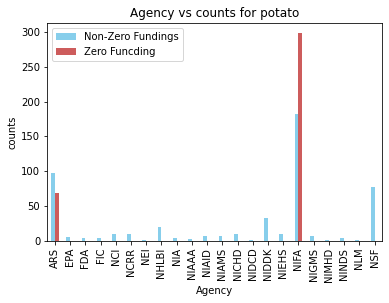

In [68]:
print('total projects',potato.shape[0])
print('count of non-zero funded projects',sum(potato.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(potato['FY Total Cost'].isnull().groupby([potato['Agency']]).sum().astype(int).to_list()))

non_zero=potato.groupby(['Agency'])['FY Total Cost'].count()
zero=potato['FY Total Cost'].isnull().groupby([potato['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for potato")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 1192
count of non-zero funded projects 903
count of zero fundings project 289


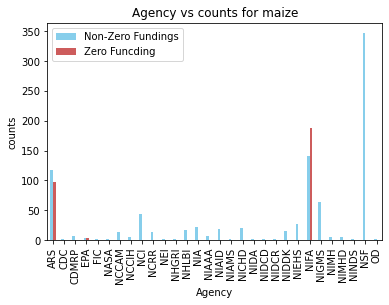

In [69]:
print('total projects',maize.shape[0])
print('count of non-zero funded projects',sum(maize.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(maize['FY Total Cost'].isnull().groupby([maize['Agency']]).sum().astype(int).to_list()))

non_zero=maize.groupby(['Agency'])['FY Total Cost'].count()
zero=maize['FY Total Cost'].isnull().groupby([maize['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for maize")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 2025
count of non-zero funded projects 1300
count of zero fundings project 725


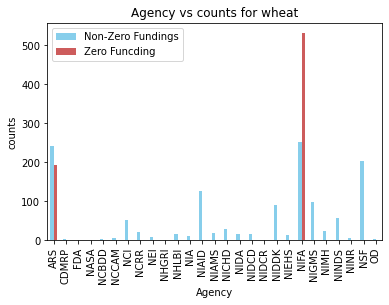

In [70]:
print('total projects',wheat.shape[0])
print('count of non-zero funded projects',sum(wheat.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(wheat['FY Total Cost'].isnull().groupby([wheat['Agency']]).sum().astype(int).to_list()))

non_zero=wheat.groupby(['Agency'])['FY Total Cost'].count()
zero=wheat['FY Total Cost'].isnull().groupby([wheat['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for wheat")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

total projects 5682
count of non-zero funded projects 3532
count of zero fundings project 2150


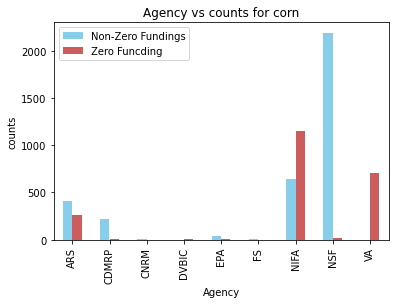

In [71]:
print('total projects',corn.shape[0])
print('count of non-zero funded projects',sum(corn.groupby(['Agency'])['FY Total Cost'].count().to_list()))
print('count of zero fundings project',sum(corn['FY Total Cost'].isnull().groupby([corn['Agency']]).sum().astype(int).to_list()))

non_zero=corn.groupby(['Agency'])['FY Total Cost'].count()
zero=corn['FY Total Cost'].isnull().groupby([corn['Agency']]).sum().astype(int)

df = pd.DataFrame({"Non-Zero Fundings":non_zero,"Zero Funcding":zero})
ax = df.plot.bar(color=["SkyBlue","IndianRed"], title="Agency vs counts for corn")
ax.set_xlabel("Agency")
ax.set_ylabel("counts")
#ax.xaxis.set_major_formatter(plt.FixedFormatter(times.strftime("%b %d %Y")))
plt.show()

# Duplicated percentage

In [90]:
wheat.columns

Index(['Name', 'Agency', 'Project Number', 'Contact PI / Project Leader',
       'Abstract', 'Project Terms', 'Awardee Organization',
       'Awardee Organization Country', 'Awardee Organization State',
       'Awardee Organization City', 'Year', 'FY Total Cost', 'Publications',
       'Patents', 'Awardee Organization District'],
      dtype='object')

In [109]:
wh=wheat[wheat['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 59
Non zero funding project in duplicates 890


In [99]:
wh=soy[soy['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 55
Non zero funding project in duplicates 1275


In [100]:
wh=coarse_grains[coarse_grains['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 0
Non zero funding project in duplicates 29


In [101]:
wh=corn[corn['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 815
Non zero funding project in duplicates 2618


In [102]:
wh=beans[beans['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 52
Non zero funding project in duplicates 549


In [103]:
wh=pulses[pulses['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 30
Non zero funding project in duplicates 2402


In [104]:
wh=potato[potato['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 19
Non zero funding project in duplicates 247


In [105]:
wh=legumes[legumes['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 38
Non zero funding project in duplicates 343


In [106]:
wh=maize[maize['Project Number'].duplicated() == True]
print('Zero funding project in duplicates',wh['FY Total Cost'].isna().sum())
print('Non zero funding project in duplicates',len(wh['FY Total Cost'])-wh['FY Total Cost'].isna().sum())

Zero funding project in duplicates 41
Non zero funding project in duplicates 687
